<a href="https://colab.research.google.com/github/joujou7285/wafer-defect-analysis/blob/main/%E5%8D%8A%E5%B0%8E%E9%AB%94%E8%A3%BD%E7%A8%8B%E6%99%B6%E5%9C%93%E7%BC%BA%E9%99%B7%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

載入雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

將晶圓圖像數據導入

In [ ]:
import pandas as pd

# 讀取 PKL 檔案的路徑
file_path = '/content/drive/MyDrive/Semiconductor/LSWMD.pkl'

# 使用 pandas 讀取資料
df = pd.read_pickle(file_path)

# 查看前幾行
print(df.head())


                                            waferMap  dieSize lotName  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   

   waferIndex trianTestLabel failureType  
0         1.0   [[Training]]    [[none]]  
1         2.0   [[Training]]    [[none]]  
2         3.0   [[Training]]    [[none]]  
3         4.0   [[Training]]    [[none]]  
4         5.0   [[Training]]    [[none]]  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [ ]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


數據預處理：晶圓缺陷分類類型

1.將類別欄位編碼

抽取 failureNum 類別數據

In [ ]:
# 將 failureType 和 trainTestLabel 映射到新的數值
df['failureNum'] = df.failureType  # 將 failureType 映射為 failureNum
df['trainTestNum'] = df.trianTestLabel  # 將 trainTestLabel 映射為 trainTestNum

# 設置映射字典
mapping_type = {'Center': 0, 'Donut': 1, 'Edge-Loc': 2, 'Edge-Ring': 3, 'Loc': 4, 'Random': 5, 'Scratch': 6, 'Near-full': 7, 'none': 8}
mapping_traintest = {'Training': 0, 'Test': 1}

# 替換 DataFrame 中的相應數值
df = df.replace({'failureNum': mapping_type, 'trainTestNum': mapping_traintest})
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,failureNum,trainTestNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]],8,0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]],8,0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]],8,0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]],8,0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]],8,0
...,...,...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]],3,1
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]],2,1
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]],3,1
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[],[],[]


2.資料整理：


遺失值處理


分成訓練集，測試集

In [ ]:
wafer_df=df.drop(columns=['dieSize','lotName','waferIndex','trianTestLabel','failureType','trainTestNum'])
import numpy as np

# 將空數組 (即 array([], shape=(0, 0), dtype=float64)) 替換為 NaN
wafer_df['failureNum'] = wafer_df['failureNum'].apply(lambda x: np.nan if isinstance(x, np.ndarray) and x.size == 0 else x)
# 刪除遺失值
wafer_df.dropna(subset=['failureNum'], inplace=True)
wafer_df

,waferMap,failureNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8.0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8.0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8.0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8.0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8.0
...,...,...
811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",2.0
811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",2.0
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",3.0
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",2.0


In [ ]:
wafer_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 172950 entries, 0 to 811454
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   waferMap    172950 non-null  object 
 1   failureNum  172950 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.0+ MB


In [ ]:
from sklearn.model_selection import train_test_split

# 隨機分割資料，指定測試集比例（例如 20%）
wafer_df_train, wafer_df_test = train_test_split(wafer_df, test_size=0.2, random_state=42)

# 查看訓練集和測試集的大小
print(f'訓練集大小: {wafer_df_train.shape}')
print(f'測試集大小: {wafer_df_test.shape}')



訓練集大小: (138360, 2)
測試集大小: (34590, 2)


預處理晶圓圖:指定形狀調整

In [ ]:
def preprocess_wafer_map(wafer_map):
    # 這裡假設 wafer_map 是 numpy 陣列，可以根據需要調整形狀
    desired_shape = (45, 48)  # 目標形狀
    if wafer_map.shape != desired_shape:
        # 如果形狀不匹配，進行填充或裁剪
        return np.resize(wafer_map, desired_shape)  # 或者使用 np.pad 進行填充
    return wafer_map

# 應用預處理
wafer_df_train['waferMap'] = wafer_df_train['waferMap'].apply(preprocess_wafer_map)
wafer_df_test['waferMap'] = wafer_df_test['waferMap'].apply(preprocess_wafer_map)



提取特徵和標籤：X 及 Y

In [ ]:
# 提取特徵和標籤
X_train = np.array(wafer_df_train['waferMap'].tolist())  # waferMap 是數據矩陣
y_train = wafer_df_train['failureNum'].tolist()  # 編碼的標籤

X_test = np.array(wafer_df_test['waferMap'].tolist())  # 提取測試集的 waferMap
y_test = wafer_df_test['failureNum'].tolist()  # 提取測試集的標籤

# 輸出訓練標籤以進行檢查
print(y_train)  # 輸出 y_train 的內容
print(y_test)   # 輸出 y_test 的內容


[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 2.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 3.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 1.0, 2.0, 8.0, 6.0, 2.0, 8.0, 8.0, 3.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 3.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 4.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 3.0, 4.0, 8.0, 2.0, 8.0, 8.0, 8.0, 8.0, 3.0, 8.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 5.0, 8.0, 8.0, 8.0, 3.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 2.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 6.0, 8.0, 2.0, 2.0, 8.0, 8.0, 8.0, 2.0, 8.0, 4.0, 8.0, 8.0, 3.0, 8.0, 1.0, 8.0, 8.0,

<function print>

In [ ]:
# 假設是灰度圖像，channels = 1
X_train = X_train.reshape(-1, 45, 48, 1)
X_test = X_test.reshape(-1, 45, 48, 1)

In [ ]:
print(X_train.shape)  # 應該是 (num_samples, height, width)
print(X_test.shape)   # 應該是 (num_samples, height, width)



(138360, 45, 48, 1)
(34590, 45, 48, 1)


數據預處理：格式調整為符合後續CNN

In [ ]:
# 將數據類型轉換為浮點數
X_train = X_train.astype(np.float32)  # 將 X_train 轉換為 float32
X_test = X_test.astype(np.float32)    # 將 X_test 轉換為 float32

# 確保 X_train 和 X_test 的形狀正確
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  # 添加通道維度
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)      # 添加通道維度

# 將 y_train 和 y_test 轉換為 NumPy 陣列
y_train = np.array(y_train)
y_test = np.array(y_test)

# 檢查轉換後的形狀
print("X_train 形狀:", X_train.shape)
print("y_train 形狀:", y_train.shape)
print("X_test 形狀:", X_test.shape)
print("y_test 形狀:", y_test.shape)
print("y_train 中的唯一類別:", np.unique(y_train))  # 顯示 y_train 中的唯一類別


X_train shape: (138360, 45, 48, 1)
y_train shape: (138360,)
X_test shape: (34590, 45, 48, 1)
y_test shape: (34590,)
Unique classes in y_train: [0. 1. 2. 3. 4. 5. 6. 7. 8.]


構建 CNN 模型

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models  # 從 Keras 引入層和模型模組

# 使用訓練集的形狀
height, width = X_train.shape[1], X_train.shape[2]  # 獲取訓練集的高度和寬度，這裡是 45 和 48
channels = 1  # 通道數量，這裡是單通道（灰階圖像）
num_classes = 9  # 根據訓練集的標籤計算類別數，這裡有 9 種故障類型

# 定義序列模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),  # 第一個卷積層，使用 32 個 3x3 的濾波器
    layers.BatchNormalization(),  # 添加批標準化層，以加快訓練速度並提高穩定性
    layers.MaxPooling2D((2, 2)),  # 最大池化層，減少特徵圖的大小

    layers.Conv2D(64, (3, 3), activation='relu'),  # 第二個卷積層，使用 64 個 3x3 的濾波器
    layers.BatchNormalization(),  # 添加批標準化層
    layers.MaxPooling2D((2, 2)),  # 最大池化層

    layers.Conv2D(64, (3, 3), activation='relu'),  # 第三個卷積層，使用 64 個 3x3 的濾波器
    layers.BatchNormalization(),  # 添加批標準化層
    layers.MaxPooling2D((2, 2)),  # 最大池化層

    layers.Flatten(),  # 將多維輸入展平為一維，以便輸入到全連接層
    layers.Dense(64, activation='relu'),  # 全連接層，具有 64 個神經元，使用 ReLU 激活函數
    layers.Dropout(0.5),  # 添加 Dropout 層，以防止過擬合，隨機丟棄 50% 的神經元

    layers.Dense(num_classes, activation='softmax')  # 最後一層，進行多類別分類，使用 softmax 激活函數
])

# 編譯模型
model.compile(optimizer='adam',  # 使用 Adam 優化器
              loss='sparse_categorical_crossentropy',  # 使用稀疏分類交叉熵作為損失函數，適合多類別分類
              metrics=['accuracy'])  # 評估指標為準確率

# 打印模型摘要以查看層的配置
model.summary()  # 顯示模型的架構摘要，包括各層的輸入輸出形狀和參數數量








/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 43, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 43, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 21, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 19, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 19, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 9, 10, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          49,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,185 (414.79 KB)

 Trainable params: 105,865 (413.54 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
# 訓練模型
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.9007 - loss: 0.4220 - val_accuracy: 0.9292 - val_loss: 0.2586
Epoch 2/10
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9341 - loss: 0.2377 - val_accuracy: 0.9425 - val_loss: 0.1969
Epoch 3/10
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9418 - loss: 0.2070 - val_accuracy: 0.9441 - val_loss: 0.2429
Epoch 4/10
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9466 - loss: 0.1883 - val_accuracy: 0.9509 - val_loss: 0.1703
Epoch 5/10
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9499 - loss: 0.1725 - val_accuracy: 0.9446 - val_loss: 0.2570
Epoch 6/10
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9525 - loss: 0.1616 - val_accuracy: 0.9517 - val_loss: 0.1741
Epoch 7/10
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9551 - loss: 0.1516 - val_accuracy: 0.9464 - val_loss: 0.2149
Epoch 8/10
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9580 - loss: 0

測試準確率 (Test Accuracy)

測試損失函數 (Test Loss)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)


1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9540 - loss: 0.2076
Test accuracy: 0.9551893472671509
Test loss: 0.20566819608211517


繪製混沌矩陣觀察分類情形

1081/1081 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


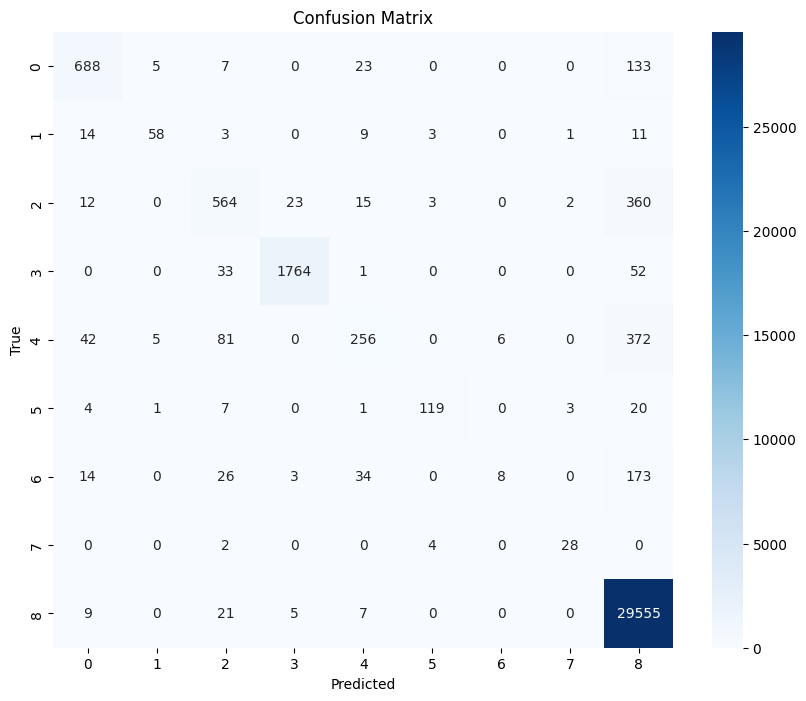

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


儲存訓練好模型

In [ ]:
# 儲存模型
# 儲存模型到 Google Drive 的指定目錄
model.save('/content/drive/MyDrive/my_model.h5')  # 儲存為 HDF5 格式

載入模型，進行實際應用之測試

In [ ]:
from tensorflow.keras.models import load_model

# 載入模型
loaded_model = load_model('/content/drive/MyDrive/my_model.h5')

# 檢查載入的模型摘要
loaded_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 43, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 43, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 21, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 19, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 19, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 9, 10, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          49,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,187 (414.80 KB)

 Trainable params: 105,865 (413.54 KB)

 Non-trainable params: 320 (1.25 KB)

 Optimizer params: 2 (12.00 B)

--------------------------------------------------------------------------------

從原始資料各類別中隨機抽取一組數據進行測試

In [ ]:
# 從數據框中選擇 failureNum 在 0 到 8 之間的樣本，並按 failureNum 分組，然後隨機選擇每個組的一個樣本
random_samples = df[df['failureNum'].between(0, 8)].groupby('failureNum').apply(lambda x: x.sample(n=1))

# 將結果轉換為數據框，並重設索引，刪除舊的索引
random_samples_df = random_samples.reset_index(drop=True)

# 打印隨機選取的樣本
print("Random samples from each failureNum class:")
print(random_samples_df)


Random samples from each failureNum class:
                                            waferMap  dieSize   lotName  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...    515.0  lot36908   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1334.0  lot17130   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1594.0  lot16221   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...    741.0  lot44287   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...    516.0  lot42996   
5  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...    712.0  lot41566   
6  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  14116.0   lot9442   
7  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...    518.0  lot43922   
8  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...    953.0  lot46545   

   waferIndex trianTestLabel    failureType failureNum trainTestNum  
0         5.0   [[Training]]     [[Center]]          0            0  
1        13.0   [[Training]]      [[Donut]]          1            

<ipython-input-18-5ca90f4614ca>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_samples = df[df['failureNum'].between(0, 8)].groupby('failureNum').apply(lambda x: x.sample(n=1))


要將原始資料轉換為同一種數據格式

In [ ]:
def preprocess_wafer_map(wafer_map):
    # 这里假设 wafer_map 是 numpy 数组，可以根据需要调整形状
    desired_shape = (45, 48)  # 目标形状
    if wafer_map.shape != desired_shape:
        # 如果形状不匹配，进行填充或裁剪
        return np.resize(wafer_map, desired_shape)  # 或者使用 np.pad 进行填充
    return wafer_map

# 应用预处理
random_samples_df['waferMap'] = random_samples_df['waferMap'].apply(preprocess_wafer_map)


In [ ]:
def preprocess_wafer_map(wafer_map):
    # 這裡假設 wafer_map 是 numpy 陣列，可以根據需要調整形狀
    desired_shape = (45, 48)  # 目標形狀設定為 (45, 48)
    if wafer_map.shape != desired_shape:
        # 如果形狀不匹配，則進行填充或裁剪
        return np.resize(wafer_map, desired_shape)  # 使用 np.resize 進行調整形狀
        # 或者可以使用 np.pad 進行填充，以達到目標形狀
    return wafer_map  # 返回調整後的 wafer_map

# 應用預處理函數到隨機樣本數據框中的 waferMap 列
random_samples_df['waferMap'] = random_samples_df['waferMap'].apply(preprocess_wafer_map)



第一個樣本的形狀: (45, 48)


In [ ]:
import numpy as np  # 匯入 NumPy 庫，用於數值計算和陣列操作

# 假設 random_samples_df['waferMap'] 具有正確的形狀，可以使用 .tolist() 方法進行轉換
X_new = np.array(random_samples_df["waferMap"].tolist())  # 將 'waferMap' 列的數據轉換為 NumPy 陣列
X_new = X_new.reshape(-1, 45, 48, 1)  # 調整形狀為 (num_samples, 45, 48, 1)
# 這裡的 -1 會根據樣本數自動計算，45 和 48 是晶圓圖的高度和寬度，1 表示通道數（灰度圖）

# 確認形狀
print("X_new shape:", X_new.shape)




X_new shape: (9, 45, 48, 1)


將處理好的資料丟入模型進行辨識

In [ ]:
# 使用載入的模型進行預測
predictions = loaded_model.predict(X_new)

# 獲取預測的類別
predicted_classes = np.argmax(predictions, axis=-1)
print("預測的類別:", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
預測的類別: [0 1 2 3 8 5 4 7 8]


最後將標籤進行轉換為晶圓缺陷類型

In [ ]:
# 將預測的數字編號轉換為對應的類別
predicted_class_labels = [list(mapping_type.keys())[list(mapping_type.values()).index(pred)] for pred in predicted_classes]

# 打印轉換後的預測類別
print("預測的原始類別:", predicted_class_labels)


預測的原始類別: ['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'none', 'Random', 'Loc', 'Near-full', 'none']
